In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from  xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('calories.csv')
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.shape


(15000, 9)

In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df = df.drop(columns = ['User_ID'],axis = 1)

In [11]:
df.shape

(15000, 8)

In [12]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
df.Gender.value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [14]:
df.replace({'Gender':{'male':0,'female':1}},inplace = True)

/tmp/ipykernel_89882/3778250159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace = True)


In [15]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
corr = df.corr()

In [17]:
corr

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264,-0.022357
Age,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

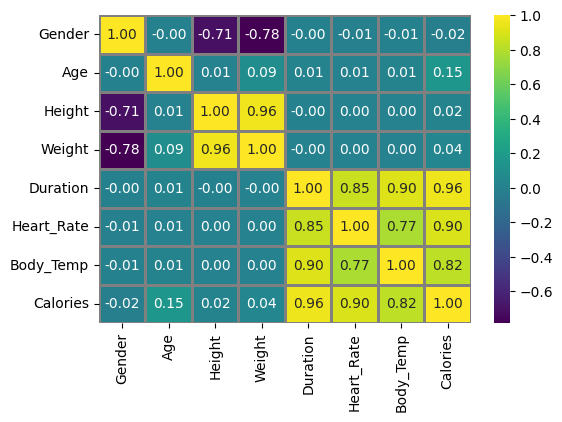

In [18]:
plt.figure(figsize = (6,4))
sns.heatmap(corr ,annot = True,fmt = '0.2f',linecolor = 'grey',linewidth = 0.9,cmap = 'viridis')

In [19]:
df['Heart_Rate'].skew()

np.float64(-0.01070407972854895)

In [20]:
df[['Heart_Rate','Calories']].corr()

,Heart_Rate,Calories
Heart_Rate,1.000000,0.897882
Calories,0.897882,1.000000


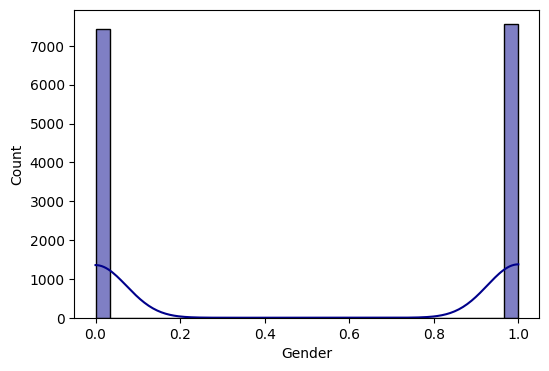

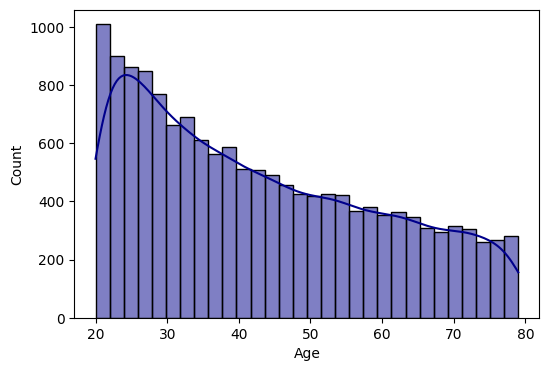

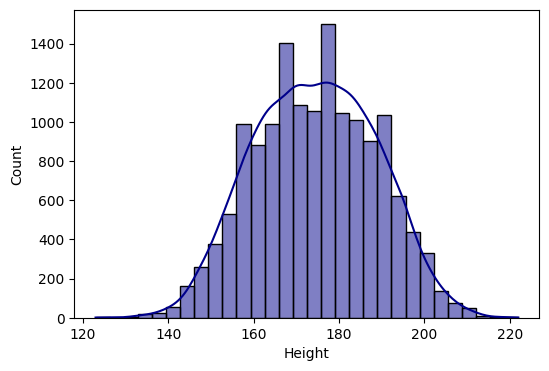

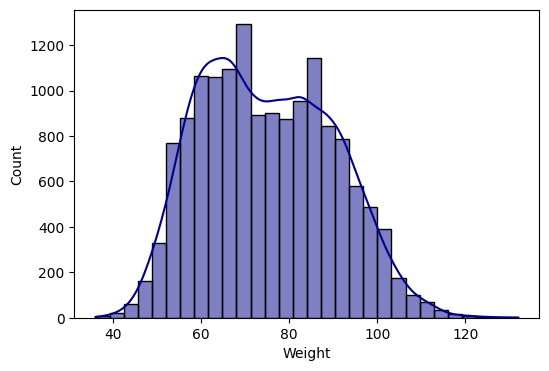

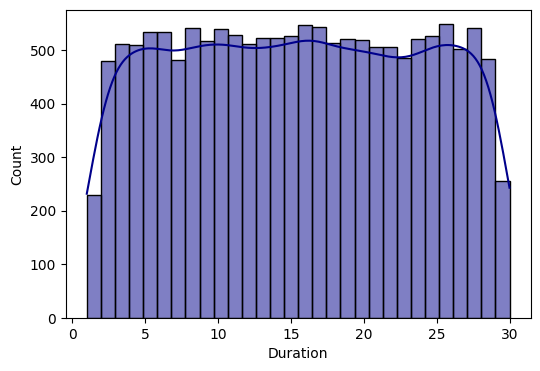

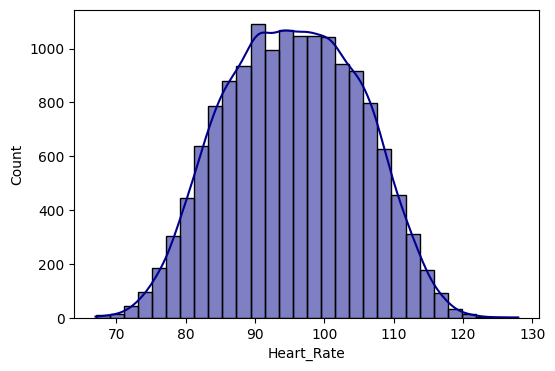

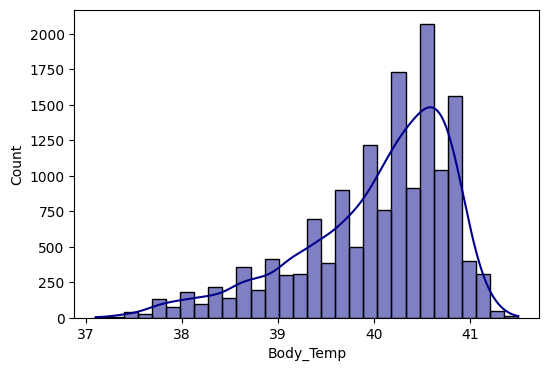

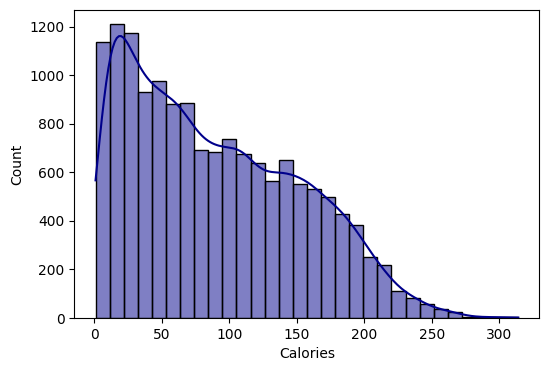

In [21]:
for i in df.columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[i],kde = True,bins = 30,color='darkblue')
     


# splitting_data

In [22]:
df.tail()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,0,63,173.0,79.0,18.0,92.0,40.5,98.0


# testing_data_segreggation

In [54]:
data = df.sample(n = 550)

test_data= data.reset_index()
test_data.drop(columns = 'index',axis = 1,inplace = True)
print(test_data.sample())

df = df.drop(data.index)
df.shape


    Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
78       0   41   185.0    88.0      19.0        97.0       40.1     101.0


(13900, 8)

In [55]:
X = df.drop(columns = ['Calories'],axis = 1)
y = df['Calories']

In [56]:
print(X.shape,y.shape)

(13900, 7) (13900,)


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [58]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11120, 7) (2780, 7) (11120,) (2780,)


In [59]:
print(X_test,y_train)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
2115        1   77   155.0    62.0       4.0        85.0       38.9
3795        1   65   166.0    64.0      27.0       114.0       40.7
9209        1   65   151.0    51.0       9.0        79.0       39.8
7340        0   53   161.0    66.0       8.0        87.0       39.5
189         1   58   165.0    68.0       6.0        88.0       39.4
...       ...  ...     ...     ...       ...         ...        ...
3909        1   21   169.0    63.0      11.0        91.0       40.0
1038        0   62   190.0    95.0      11.0        93.0       40.1
7766        0   25   197.0    97.0      14.0        92.0       40.4
12660       1   26   168.0    64.0       3.0        84.0       38.6
2434        1   53   156.0    55.0       5.0        74.0       39.1

[2780 rows x 7 columns] 8595      36.0
2781     167.0
477       51.0
8187      62.0
8230     161.0
         ...  
5607     219.0
14475    137.0
5820      48.0
926        9.0
7855     

In [60]:
model = XGBRegressor(n_jobs = -1) 

In [61]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [62]:
model.fit(X_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

In [63]:
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)

In [64]:
train_acc = metrics.mean_absolute_error(y_train,X_train_pred)
test_acc = metrics.mean_absolute_error(y_test,X_test_pred)

In [65]:
print('accuracy of training data = ',train_acc)

accuracy of training data =  0.9237865325304673


In [66]:
print('accuracy of testing data = ',test_acc)

accuracy of testing data =  1.4674442538361756


In [67]:
residual = y_test - X_test_pred

Text(0, 0.5, 'X_test_pred')

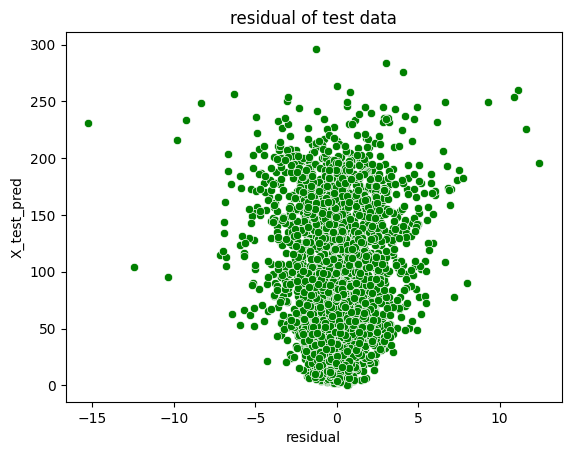

In [68]:
sns.scatterplot(y = X_test_pred,x = residual,color  = 'green')
plt.title('residual of test data')
plt.xlabel('residual')
plt.ylabel('X_test_pred')

<Axes: xlabel='Calories', ylabel='Count'>

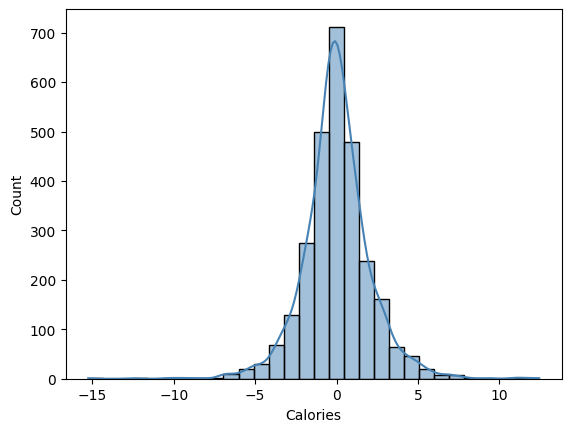

In [69]:
sns.histplot(residual,color = 'steelblue',kde = True,bins = 30)

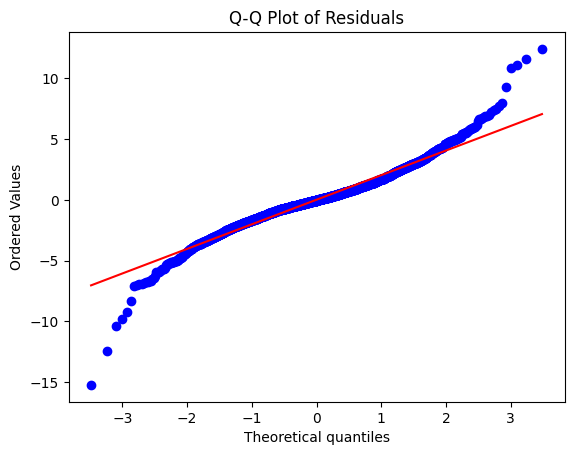

In [70]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residual, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [71]:
residual2 = y_train-X_train_pred
residual2

8595     0.234547
2781     1.763611
477     -1.004936
8187     0.119347
8230    -0.040039
           ...   
5607     0.272964
14475    0.117065
5820    -0.360016
926      0.479539
7855     1.123997
Name: Calories, Length: 11120, dtype: float64

<Axes: xlabel='Calories'>

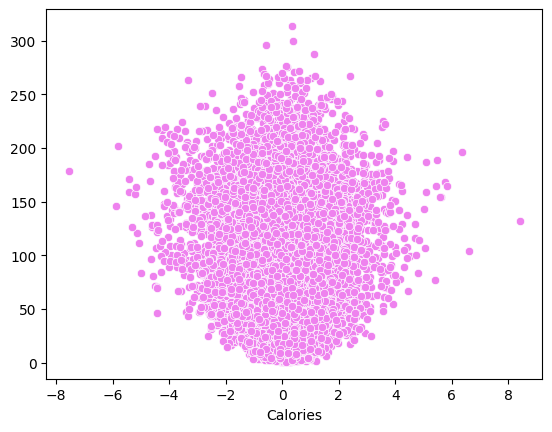

In [72]:
sns.scatterplot(y = X_train_pred,x = residual2,color  = 'violet')

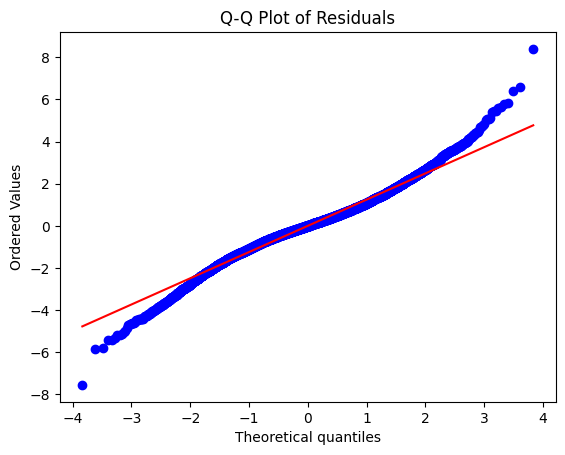

In [73]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residual2, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


<Axes: xlabel='Calories', ylabel='Count'>

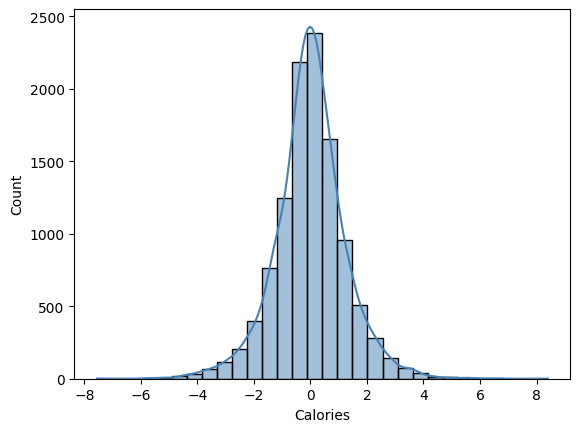

In [74]:
sns.histplot(residual2,color = 'steelblue',kde = True,bins = 30)

In [75]:
import pickle

In [76]:
pickle.dump(model,open('my_model.pkl','wb'))

In [77]:
pikled_model = pickle.load(open('my_model.pkl','rb'))

In [78]:
pikled_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=-1, num_parallel_tree=None, ...)

# my_output

In [82]:
a = int(input("Enter the input : "))
Input = test_data.iloc[a]

# remove result columns
Input = Input.iloc[0:-1]

# 1. Extract the row correctly (for example, row index `a`)
to_array = Input.to_numpy()
to_array


# 2. Reshape to 2D for model input (1 sample, 7 features)
final_input = to_array.reshape(1,-1)
# final_input = to_array.reshape(1, -1)

final_input

# 3. Predict
result = pikled_model.predict(final_input)

print(f"\n\nmy output is {result} \n\n expected output = {test_data['Calories'][a]}")

Enter the input :  8




my output is [75.529305] 

 expected output = 77.0


In [80]:
test_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,67,187.0,87.0,9.0,87.0,39.5,46.0
1,0,41,171.0,73.0,10.0,86.0,40.0,34.0
2,1,41,159.0,57.0,17.0,93.0,40.1,85.0
3,1,31,162.0,60.0,12.0,92.0,39.6,56.0
4,1,41,181.0,70.0,2.0,76.0,38.7,6.0
